In [1]:
# Blatt 1 Aufgabe 2
#
# Rosenbrock function
# f(x, y) = 100 (y - x^2)^2 + (1 - x)^2

In [ ]:
# a) Calc Rosenbrock function at xy

def rosenbrock(xy: tuple[float, float]) -> float:
    x, y = xy
    return 100 * (y - x**2)**2 + (1 - x)**2


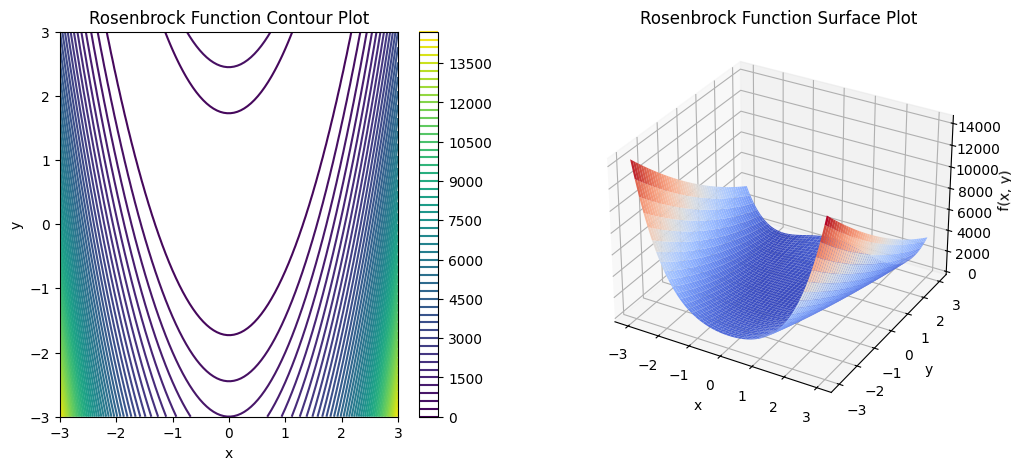

In [ ]:
# b) Plot around (0, 0)

# %pip install matplotlib numpy
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

def plot_rosenbrock(
        rangex: tuple[float, float]=(-3, 3),
        rangey: tuple[float, float]=(-3, 3),
        steps:int=100):
    x = np.linspace(rangex[0], rangex[1], steps)
    y = np.linspace(rangey[0], rangey[1], steps)
    X, Y = np.meshgrid(x, y)
    Z = rosenbrock((X, Y))
    
    fig = plt.figure(figsize=(12, 5))
    
    ax1 = fig.add_subplot(1, 2, 1)
    contour = ax1.contour(X, Y, Z, levels=50, cmap='viridis')
    fig.colorbar(contour, ax=ax1)
    ax1.set_title('Rosenbrock Function Contour Plot')
    ax1.set_xlabel('x')
    ax1.set_ylabel('y')
    
    ax2 = fig.add_subplot(1, 2, 2, projection='3d')
    wireframe = ax2.plot_surface(X, Y, Z,cmap=cm.coolwarm)
    ax2.set_title('Rosenbrock Function Surface Plot')
    ax2.set_xlabel('x')
    ax2.set_ylabel('y')
    ax2.set_zlabel('f(x, y)')
    plt.show()

plot_rosenbrock()

In [4]:
# c) partial derivative at (x0, y0)

def rosenbrock_derivative_x(xy0) -> float:
    x, y = xy0
    return -400 * x * (y - x**2) - 2 * (1 - x)

def rosenbrock_derivative_y(xy0) -> float:
    x, y = xy0
    return 200 * (y - x**2)

def rosenbrock_gradient(xy0) -> tuple[float, float]:
    return (rosenbrock_derivative_x(xy0), rosenbrock_derivative_y(xy0))

In [5]:
# d) derivate in direction p at (x0, y0)

def rosenbrock_directional_derivative(xy0, p) -> float:
    grad = rosenbrock_gradient(xy0)
    # return np.dot(grad, p)
    return grad[0] * p[0] + grad[1] * p[1]

rosenbrock_directional_derivative(xy0=(2, 1), p=(1, 1))

1802

In [6]:
# e) Approximate d) numerically

# Careful: going too small with epsilon can lead to numerical instability
def rosenbrock_directional_derivative_numeric(xy0, p, epsilon=1e-12) -> float:
    f_x0 = rosenbrock(xy0)
    x0, y0 = xy0
    f_xe = rosenbrock((x0 + epsilon * p[0], y0 + epsilon * p[1]))
    return (f_xe - f_x0) / epsilon

rosenbrock_directional_derivative_numeric(xy0=(2, 1), p=(1, 1))

1802.1637515630573